In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Рассмотрите схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха 𝑝.
Постройте несколько графиков априорного (сопряженное из теоретической задачи)
распределения для разных параметров и охарактеризуйте, как значения парамет-
ров априорного распределения соотносятся с априорными знаниями о монете. Это
могут быть, например, знания вида ”монета скорее честна” (при таком априорном
распределении наиболее вероятны значения 𝑝 в окрестности 0.5) , ”монета нечест-
ная” (наименее вероятны значения 𝑝 в окрестности 0.5), ”монета скорее нечестная,
перевес в сторону герба” (наиболее вероятны значения 𝑝 в окрестности 1).

Априорное для Бернулли - бета-распределение с параметрами $(\alpha, \beta)$

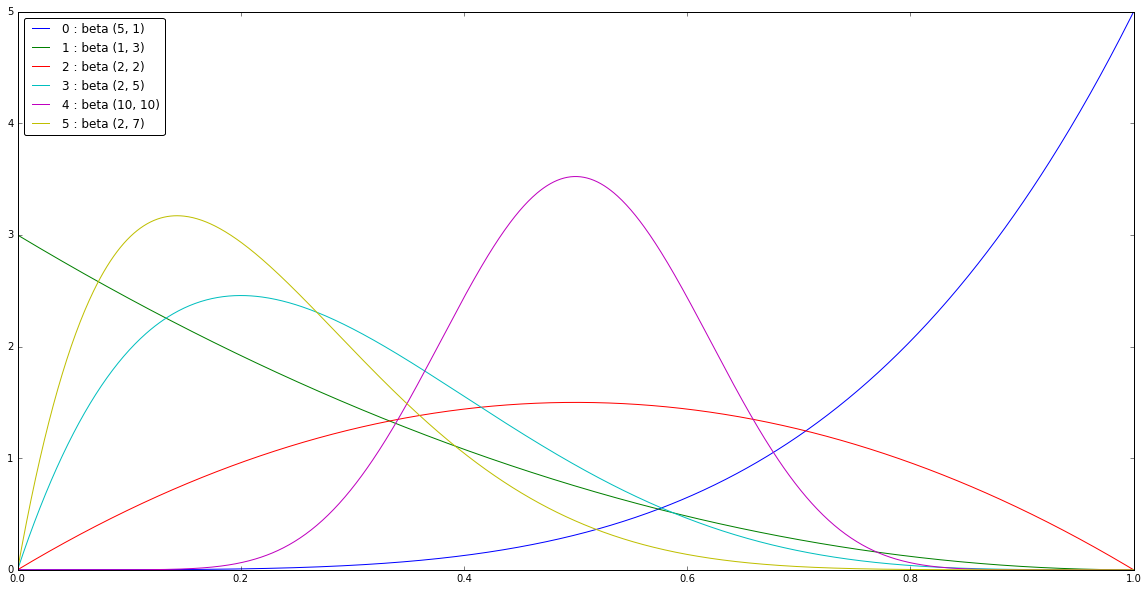

In [23]:
from scipy.stats import beta

params = [ [5.,1.], [1.,3.], [2.,2.], [2.,5.], [10.,10.], [2., 7.]]
X = np.linspace(0., 1., 1000)
plt.figure(figsize=(20,10))

for i, param in enumerate(params):
    my_beta = lambda x : beta.pdf(x, param[0], param[1])
    Y = map(my_beta, X)
    label = '%d : beta (%d, %d)' % (i, param[0], param[1])
    plt.plot(X, Y, label=label)
    
plt.legend(loc='upper left', fancybox=True)
plt.show()

Чем больше $\alpha$ при фиксированном значении $\beta$, тем больше перевес в сторону p~1 и наоборот.

Чем больше и ближе друг к другу $\alpha$ и $\beta$, тем честнее монета (хвосты легче от величины, сдвига нет от близости)

### Сопряженное к априорному:
бета-распределение с параметрами $(\alpha^{'}, \beta^{'})$:

$(\alpha + \sum_{i=1}^n x_i,\, \beta + n - \sum_{i=1}^n x_i\!)$

Его матожидание (байесовская оценка): 

$\theta^* = \frac{\alpha^{'}}{\alpha^{'}+\beta^{'}} = \frac{\alpha + \sum X_i}{\alpha + \beta + n}$

Проведите 20 бросков разных монет (можно сгенерировать на компьютере несколь-
ко выборок для различных 𝑝) и найдите байесовские оценки вероятности выпадения
герба при различных параметрах априорного распределения, при которых получа-
ются разные интерпретации априорных знаний (достаточно трех пар). Сравните с
оценками максимального правдоподобия. Постройте графики абсолютных величин
отклонений оценок, построенных по выборке 𝑋1, . . . , 𝑋𝑛 (𝑛 ≤ 20), от истинных значе-
ний параметра в зависимости от 𝑛 (для разных 𝑝 разные графики). Сделайте выводы

Оценка максимального правдоподобия для Бернулли:

$\theta^* = \frac{\sum X_i}{n}$

In [26]:
def bayes_estimator(X_array, param):
    a, b = param[0], param[1]
    return (a + X_array.sum())*1. / (a + b + len(X_array)*1.)

def likelihood_estimator(X_array):
    return X_array.mean()

In [54]:
def graph(p):
    params = [ [5.,5.], [2.,7.], [3.,1.] ]
    big_sample = sts.bernoulli(p).rvs(size=20)

    sample = np.array([])
    bayes_values = [[],[],[],[]]
    likelihood_values = []

    for n in range(0, len(big_sample)):
        sample = np.append(sample, big_sample[n])
        for i, param in enumerate(params):
            bayes_values[i].append(abs(p - bayes_estimator(sample, param)))
        likelihood_values.append(abs(p - likelihood_estimator(sample)))

    N = range(0, len(big_sample))
    plt.figure(figsize=(20,8))
    plt.plot(N, likelihood_values, label='likelihood')

    for i, param in enumerate(params):
        label = "bayes (%d, %d)" % (int(param[0]), int(param[1]))
        plt.plot(N, bayes_values[i], label=label)

    plt.legend(loc='upper center', fancybox=True)
    plt.show()

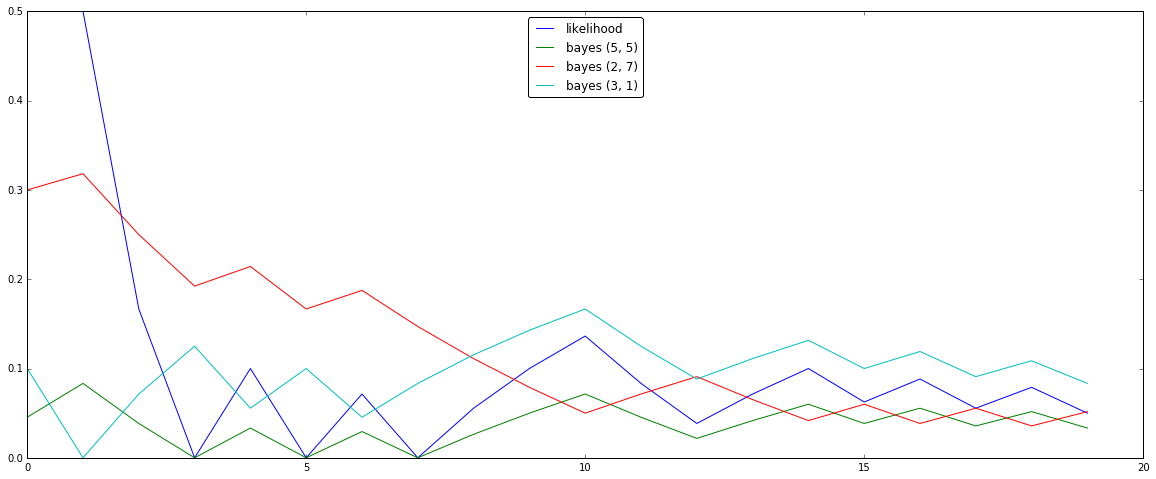

In [77]:
graph(.5)

Зеленый - лучший (p посередине, а зеленый симметричен, то есть знает, что p~1/2)

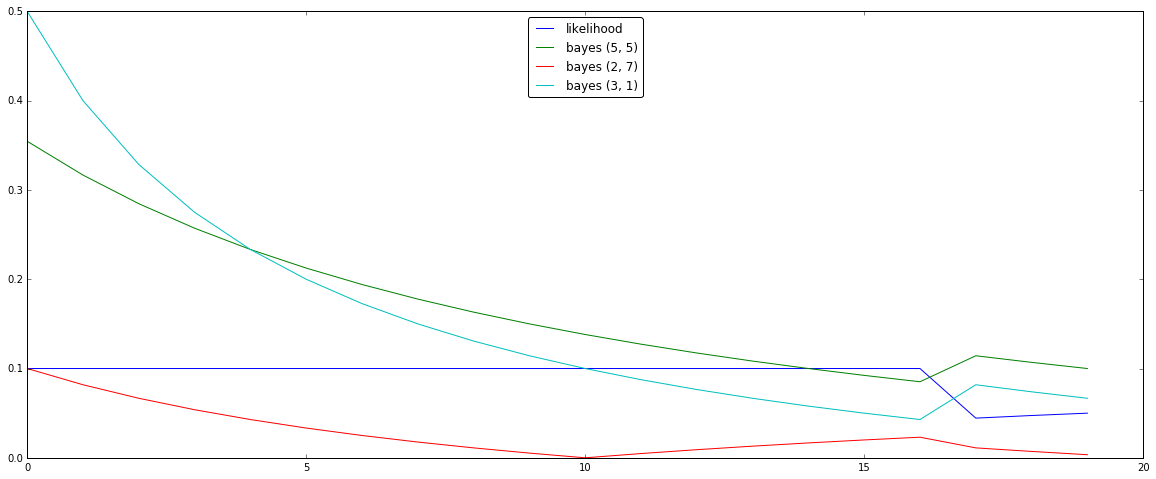

In [60]:
graph(.1)

Красный - лучший ($\beta>\alpha$, значит перекос в априорном распределении к 0)

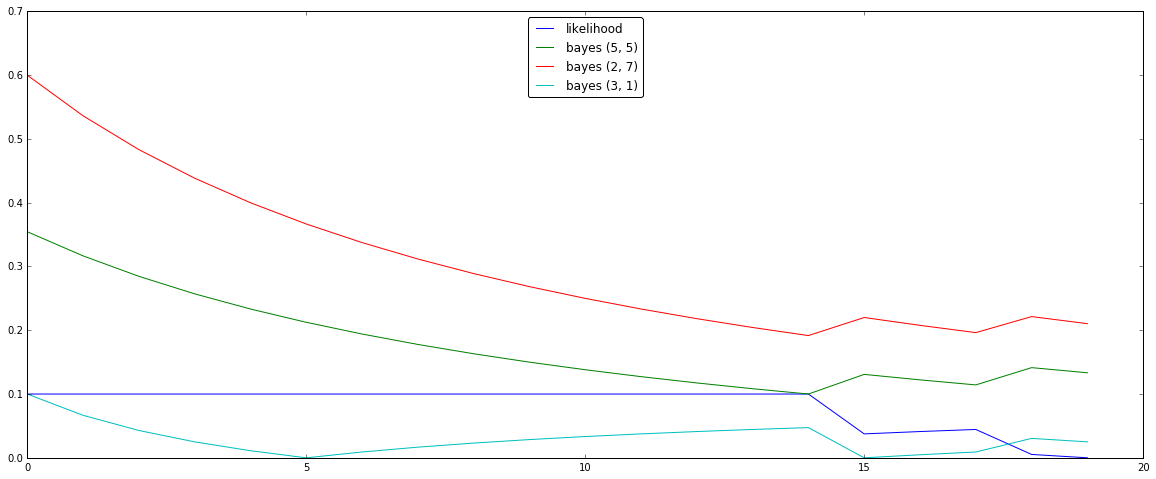

In [61]:
graph(.9)

Бирюзовый - лучший (перекос вправо, $\beta<\alpha$

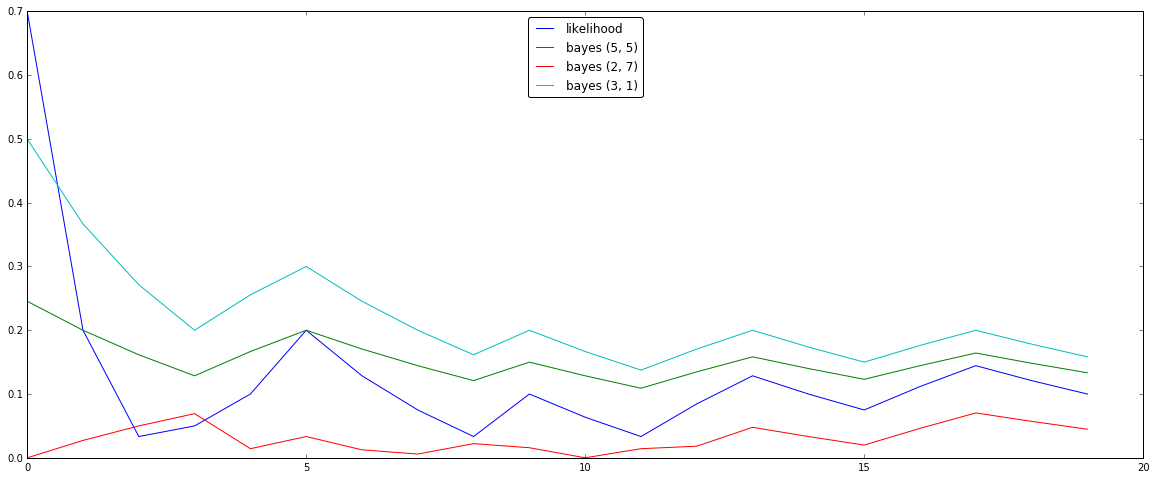

In [65]:
graph(.3)

Выборка всего лишь из 20 (но все равно видно, что красный побеждает, ведь он перекошен влево) - поэтому байесовские оценки круты, можно пользоваться маленькими выборками. Попробуем более крайние значения p:

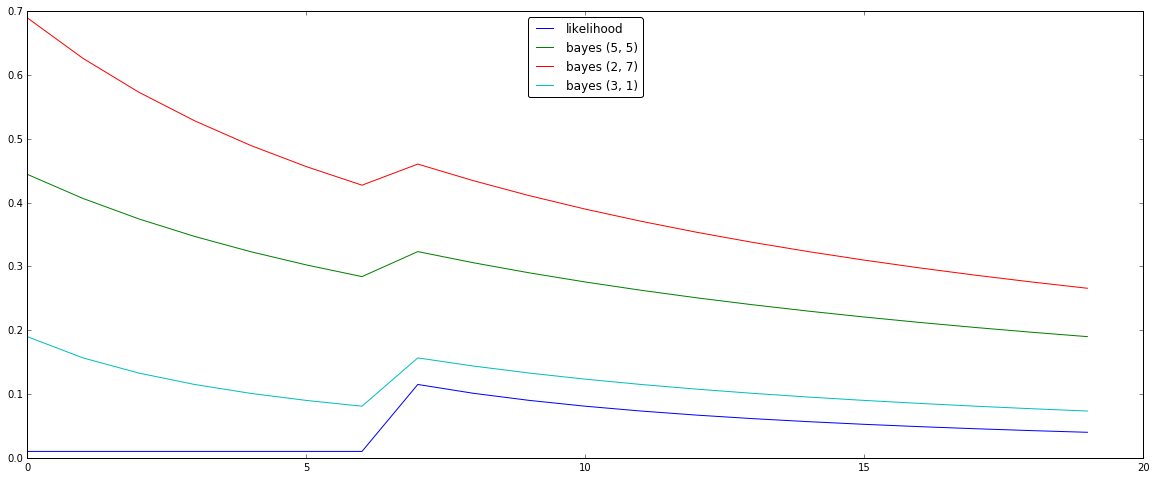

In [67]:
graph(.99)

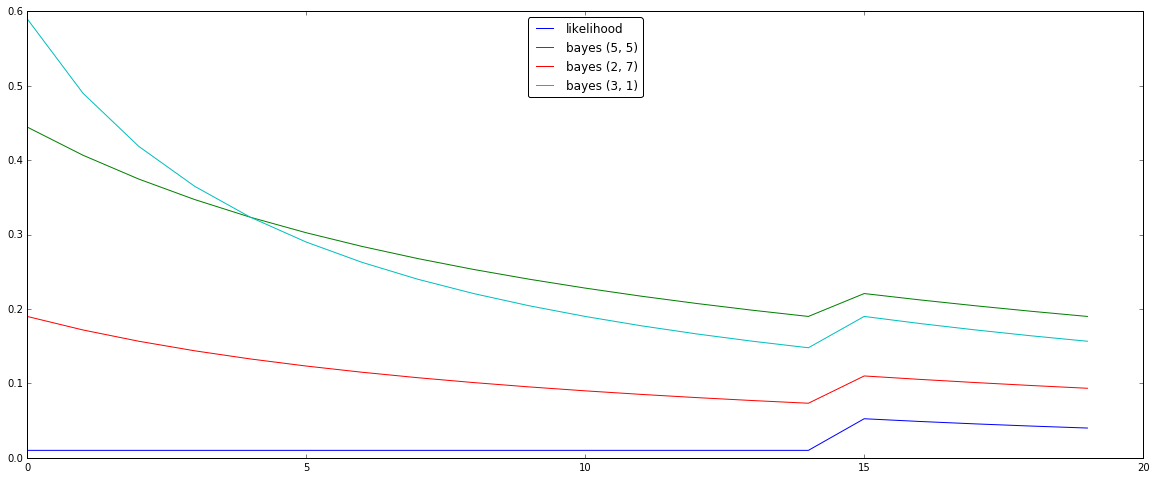

In [71]:
graph(.01)

# Вывод:
## видим, что параметры для априорного распределения нужно выбирать разумно. 
## Когда монетка честная, то лучше всего оценка у $\alpha$~$\beta$, при чем когда они как можно больше.
## Если монетка больше любит выпадать на 1 (герб), то точнее всего - оценка при $\alpha > \beta$, потому что это обуславливает перекос $\theta$ вправо, к 1. 